*Note: This file is provided in two formats: 
Python (simpleExample.py) and a Jupyter 
notebook (simpleExample.ipynb).  The 
Jupyter notebook opens in a web browser and 
includes plots in an interactive format.  To 
open the .ipynb file, run:*
    
    jupyter notebook simpleExample.ipynb

*To run the .py file in iPython at the command line, run:*

    ipython
    %run simpleExample.py
    plt.show()

simpleExample.ipynb
-------------------

- Bryan Daniels

- 1.29.2014; updated 1.18.2019; updated 4.14.2022

- Uses a simple 1D harmonic oscillator example to demonstrate usage of SirIsaac.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from SirIsaac import fittingProblem

Failed to import libsbml.
SBML import and export not available.
Failed to import pygraphviz.  Network figures unavailable.


Load example data
-----------------

In the example data file, we have four columns, each with 100 data points, listing:

* Initial condition *x_init*
* Measurement time *t*
* Measurement value *x*
* Measurement uncertainty (standard deviation)

In [2]:
data = np.loadtxt('simpleExample_data.txt')

We now put this in a format compatible with SirIsaac.  First we make a list of input values (in this case initial conditions):



In [3]:
indepParamsList = [ [ expt[0] ] for expt in data ]

In [4]:
indepParamsList[:3]

[[1.1272274339047885], [1.403399302209734], [1.140086651015479]]

Next, we have a corresponding list of data taken at each of those input values, in the format below.  In this case, we only have one variable *x*.  (Note: In general, multiple timepoints could be also be measured at each input value; in all of our examples, we measure all variables at a single timepoint per input value.)

In [5]:
# [ {'var1': { time0: ( value, uncertainty ) },
#    'var2': { time0: ( value, uncertainty ) },
#     ... },
#   {'var1': { time1: ( value, uncertainty ) },
#    'var2': { time1: ( value, uncertainty ) },
#     ... },
#   ... ]

In [6]:
sirIsaacData = []
for expt in data:
    sirIsaacData.append( { 'x': { expt[1]: ( expt[2], expt[3] ) } } )

In [43]:
# 2022.4.15 try adding datapoint at a long time with large error bar
#           to force the model to be integrable for at least that long
sirIsaacData = []
largeTime,largeTimeErr = 2.,1e6
for IC,t,val,valErr in data:
    sirIsaacData.append( { 'x': { t: ( val, valErr ) ,
                                  largeTime: ( 0, largeTimeErr ) } 
                         } )

In [44]:
sirIsaacData[:3]

[{'x': {0.5454701510335127: (1.2623428576416922, 0.1), 2.0: (0, 1000000.0)}},
 {'x': {0.17186531503221092: (2.018996005787428, 0.1), 2.0: (0, 1000000.0)}},
 {'x': {0.8529318094853018: (1.371899809743871, 0.1), 2.0: (0, 1000000.0)}}]

Finally, SirIsaac will need to know what to call the input and output values.  In this case, the input corresponds to the initial value of *x*.  The way to indicate this to SirIsaac is by using the name 'x_init', where 'x' is the name of the corresponding variable.

Here we have one input and one output:

In [31]:
outputNames = ['x']
indepParamNames = ['x_init']

Create SirIsaac FittingProblem
------------------------------

We'll attempt to fit a model in the power law class.  To do this, we'll create an instance of a PowerLawFittingProblem.  Here we set up its arguments and create it:

In [45]:
# complexityList lists which models in the model class may be tested.
# (Note that by default SirIsaac will still stop once 3 models have 
#  smaller estimated log-likelihood.)
complexityStepsize = 2 # increase complexity with steps of size 2
complexityMax = 25 # don't try models with complexity > 25
complexityList = range(0,complexityMax,complexityStepsize) 

# ensGen controls the generation of the initial ensemble of 
# parameter starting points.
totalSteps = 1e3
keepSteps = 10
seeds = (1,1) # use a fixed random seed
ensTemperature = 100.
ensGen = fittingProblem.EnsembleGenerator( totalSteps, keepSteps,
    temperature=ensTemperature, seeds=seeds )

# Parameters that control when local fitting stops.
avegtol = 1e-2
maxiter = 100

# priorSigma controls the width of priors on all parameters
priorSigma = 3.

# If you have mpi4py installed, you can run on multiple processors
numprocs = 4 #10

# We'll only use a subset of our data to make the example run faster
N = 20

p = fittingProblem.PowerLawFittingProblem( complexityList, 
    sirIsaacData[:N], indepParamsList=indepParamsList[:N], 
    outputNames=outputNames, indepParamNames=indepParamNames, 
    ensGen=ensGen, avegtol=avegtol, maxiter=maxiter,
    priorSigma=priorSigma, numprocs=numprocs, verbose=True )

In [ ]:
# BCD testing

In [ ]:
# try with CTSN
pCTSN = fittingProblem.CTSNFittingProblem( complexityList, 
    sirIsaacData[:N], indepParamsList=indepParamsList[:N], 
    outputNames=outputNames, indepParamNames=indepParamNames, 
    ensGen=ensGen, avegtol=avegtol, maxiter=maxiter,
    priorSigma=priorSigma, numprocs=numprocs, verbose=True )

In [ ]:
# END BCD testing

Run parameter fitting
---------------------

The bulk of computation time is used to fit the parameters of each model to the data.  Uncomment the following lines to run the parameter fitting, which takes a few hours using 10 processors.  Or skip ahead to load a version that has already been fit.

In [46]:
## Uncomment to run parameter fitting.
p.fitAll()

fittingProblem.save(p,'simpleExample_savedFittingProblem.data')

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_beta_0', 'g_0_0']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 463.29596633837554 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.29597443924484 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.2959784794242 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.29597875586796 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.2969852653402 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.29597679554485 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.29596235539873 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 463.2959753089623 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 439.9564136629441 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 439.95687365874903 ( 2 )
SloppyCellFittingModel.fitToData: Best-fit cost =  439.9564136629441
fittingProblem.fitAll: L = -224.07802472138536
SloppyCellFittingModel.f

/Users/bryandaniels/Desktop/SloppyCell/SloppyCell/ReactionNetworks/Dynamics.py:711: RuntimeWarning: divide by zero encountered in true_divide
  ypIC[N_dyn_vars:] /= net.get_var_ic(opt_var)


fittingProblem.fitAll: L = -139.09525675071473
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_alpha_0', 'log_beta_0', 'g_0_0', 'h_0_0', 'g_0_1', 'h_0_1', 'g_1_1', 'g_1_0', 'h_1_0']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 326.2570942533452 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 514.4513121892932 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4514799592258 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.4514247726067 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 332.1656153458264 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 514.4513186558426 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 441.96249007859507 ( 3 )
SloppyCellFittingModel.fitToData: Cost = 436.7601091081131 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 438.1388897892613 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 269.23079683034507 ( 2 )
SloppyCellFittingModel.fitTo

/Users/bryandaniels/Desktop/SloppyCell/SloppyCell/ReactionNetworks/Dynamics.py:711: RuntimeWarning: divide by zero encountered in true_divide
  ypIC[N_dyn_vars:] /= net.get_var_ic(opt_var)


fittingProblem.fitAll: L = -139.09546982959063
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_alpha_0', 'log_beta_0', 'g_0_0', 'h_0_0', 'g_0_1', 'h_0_1', 'log_beta_1', 'g_1_1', 'h_1_1', 'g_1_0', 'h_1_0']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 514.5624253372059 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 514.5654457024073 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 438.27901854661894 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 433.83812358520413 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 93.4127755044726 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 432.1507112226111 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 438.26780452341194 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 514.5624228774556 ( 2 )
SloppyCellFittingModel.fitToData: Cost = 432.24831470056444 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 269.2307936316761 ( 2 )
Slop

/Users/bryandaniels/Desktop/SloppyCell/SloppyCell/ReactionNetworks/Dynamics.py:711: RuntimeWarning: divide by zero encountered in true_divide
  ypIC[N_dyn_vars:] /= net.get_var_ic(opt_var)


fittingProblem.fitAll: L = -84.59817747843715
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['log_alpha_0', 'log_beta_0', 'g_0_0', 'h_0_0', 'g_0_1', 'h_0_1', 'g_0_2', 'h_0_2', 'log_alpha_1', 'log_beta_1', 'g_1_1', 'h_1_1', 'g_1_0', 'h_1_0', 'g_1_2', 'g_2_2', 'g_2_0', 'h_2_0']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 118.58258913092892 ( 3 )
SloppyCellFittingModel.fitToData: Cost = 96.3035185791828 ( 3 )
SloppyCellFittingModel.fitToData: Cost = 110.75087893375857 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 67.02134345054775 ( 3 )
SloppyCellFittingModel.fitToData: Cost = 111.88666808588947 ( 4 )
SloppyCellFittingModel.fitToData: Cost = 87.19814226214913 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 89.83717564011036 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 78.25139273448372 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 93.92125657251044 ( 3 )
Sl

In [13]:
pCTSN.fitAll()

SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'log_tau_0']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 1536.4120125022907 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 5030.203521481821 ( 3 )
SloppyCellFittingModel.fitToData: Cost = 390.6579940259445 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 5057.187390972898 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 4876.142910814324 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 5042.448407208736 ( 3 )
SloppyCellFittingModel.fitToData: Cost = 385.7461188721268 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 5015.797763690851 ( 3 )
SloppyCellFittingModel.fitToData: Cost = 4278.904274780563 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 388.39720618127916 ( 0 )
SloppyCellFittingModel.fitToData: Best-fit cost =  385.7461188721268
fittingProblem.fitAll: L = -199.58854684396687
running build_ext
running b

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


	Wrote C/API module "CTSN_0_SFI_C02TJ318GTFL_206650_5752999461_55397" to file "./CTSN_0_SFI_C02TJ318GTFL_206650_5752999461_55397module.c"
  adding 'build/src.macosx-10.9-x86_64-3.8/./fortranobject.c' to sources.
  adding 'build/src.macosx-10.9-x86_64-3.8/.' to include_dirs.
copying /Users/bryandaniels/anaconda3/lib/python3.8/site-packages/numpy/f2py/src/fortranobject.c -> build/src.macosx-10.9-x86_64-3.8/.


***STDOUT***
b''
***STDERR***
b''
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'theta_0', 'log_tau_0', 'w_0_1', 'X_1_init']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 291.3175652946103 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 310.69303713003586 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 5466.122078238009 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 5094.482914784238 ( 3 )
SloppyCellFittingModel.fitToData: Cost = 5131.336364436838 ( 3 )
SloppyCellFittingModel.fitToData: Cost = 4292.5965574072725 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 328.4061879865533 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 385.3093451818846 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 395.7798498670198 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 382.7978218136929 ( 1 )
SloppyCellFittingModel.fitToData: Best-fit cost =  291.3175652946103
fittingP

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		Constructing wrapper function "res_function_logdv"...
		  residual = res_function_logdv(time,log_dv,log_yp,constants)
		Constructing wrapper function "root_func_logdv"...
		  root_devs = root_func_logdv(t,log_dv,log_yp,constants)
		Constructing wrapper function "sens_rhs_logdv"...
		  sens_res = sens_rhs_logdv(time,sens_y_log,sens_yp_log,constants)
		Constructing wrapper function "integrate_stochastic_tidbit"...
		  time_ptr,dv,stop_time_ptr,trajectory = integrate_stochastic_tidbit(seed_ptr,reseed,time_ptr,dv,cv,rmsd_ptr,stop_time_ptr)
	Wrote C/API module "CTSN_0_SFI_C02TJ318GTFL_516583_0353999461_55397" to file "./CTSN_0_SFI_C02TJ318GTFL_516583_0353999461_55397module.c"
  adding 'build/src.macosx-10.9-x86_64-3.8/./fortranobject.c' to sources.
  adding 'build/src.macosx-10.9-x86_64-3.8/.' to include_dirs.
copying /Users/bryandaniels/anaconda3/lib/python3.8/site-packages/numpy/f2py/src/fortranobject.c -> build/src.macosx-10.9-x86_64-3.8/.


***STDOUT***
b''
***STDERR***
b''
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'theta_0', 'log_tau_0', 'w_0_1', 'wself_1', 'w_1_0', 'X_1_init']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 294.2995562214289 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 344.8984506687302 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 448.2068426634915 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 435.4494242894624 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 320.70062802954976 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 260.27806542382683 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 278.4968526298386 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 280.55433370954637 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 365.9478095810025 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 258.2382837565246 ( 1 )
SloppyCellFittingModel.fitToData: Best-fit cost =  258.2

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		Constructing wrapper function "root_func_logdv"...
		  root_devs = root_func_logdv(t,log_dv,log_yp,constants)
		Constructing wrapper function "sens_rhs_logdv"...
		  sens_res = sens_rhs_logdv(time,sens_y_log,sens_yp_log,constants)
		Constructing wrapper function "integrate_stochastic_tidbit"...
		  time_ptr,dv,stop_time_ptr,trajectory = integrate_stochastic_tidbit(seed_ptr,reseed,time_ptr,dv,cv,rmsd_ptr,stop_time_ptr)
	Wrote C/API module "CTSN_0_SFI_C02TJ318GTFL_895230_5173999461_55397" to file "./CTSN_0_SFI_C02TJ318GTFL_895230_5173999461_55397module.c"
  adding 'build/src.macosx-10.9-x86_64-3.8/./fortranobject.c' to sources.
  adding 'build/src.macosx-10.9-x86_64-3.8/.' to include_dirs.
copying /Users/bryandaniels/anaconda3/lib/python3.8/site-packages/numpy/f2py/src/fortranobject.c -> build/src.macosx-10.9-x86_64-3.8/.


***STDOUT***
b''
***STDERR***
b''
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'theta_0', 'log_tau_0', 'w_0_1', 'wself_1', 'theta_1', 'log_tau_1', 'w_1_0', 'X_1_init']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 250.6960061873964 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 214.33086364201878 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 172.4977305561773 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 169.9012552402698 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 174.85145974868036 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 222.9371854819502 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 659.9023489728859 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 509.20877459035773 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 187.52669800235537 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 183.10885285545876 ( 1 )
SloppyCellFittingModel.fitToDa

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		Constructing wrapper function "dres_dtheta_1"...
		  pd = dres_dtheta_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_tau_1"...
		  pd = dres_dlog_tau_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_0"...
		  pd = dres_dw_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_1_init"...
		  pd = dres_dX_1_init(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_2_0"...
		  pd = dres_dw_2_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_2_init"...
		  pd = dres_dX_2_init(time,dynamicVars,yprime,constants)
		Constructing wrapper function "sens_rhs"...
		  sens_res = sens_rhs(time,sens_y,sens_yp,constants)
		Constructing wrapper function "res_function_logdv"...
		  residual = res_function_logdv(time,log_dv,log_yp,constants)
		Constructing wrapper function "root_func_logdv"...
		  root_devs = root_func_logdv(t,log_dv,log_yp,constants)
		Constructin

***STDOUT***
b''
***STDERR***
b''
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'theta_0', 'log_tau_0', 'w_0_1', 'w_0_2', 'wself_1', 'theta_1', 'log_tau_1', 'w_1_0', 'X_1_init', 'w_2_0', 'X_2_init']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 227.33287776689724 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 222.49235292195175 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 209.5882934940421 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 193.97895308537278 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 203.95155782101972 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 199.5908564171267 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 208.1570211092333 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 210.53368358679242 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 189.12333359348142 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 168.16534214581253 ( 0 

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		  pd = dres_dlog_tau_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_0"...
		  pd = dres_dw_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_2"...
		  pd = dres_dw_1_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_1_init"...
		  pd = dres_dX_1_init(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_2_0"...
		  pd = dres_dw_2_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_2_1"...
		  pd = dres_dw_2_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_2_init"...
		  pd = dres_dX_2_init(time,dynamicVars,yprime,constants)
		Constructing wrapper function "sens_rhs"...
		  sens_res = sens_rhs(time,sens_y,sens_yp,constants)
		Constructing wrapper function "res_function_logdv"...
		  residual = res_function_logdv(time,log_dv,log_yp,constants)
		Constructing wrapper function "root_func_logdv"...
		  root_devs = root_fun

***STDOUT***
b''
***STDERR***
b''
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'theta_0', 'log_tau_0', 'w_0_1', 'w_0_2', 'wself_1', 'theta_1', 'log_tau_1', 'w_1_0', 'w_1_2', 'X_1_init', 'w_2_0', 'w_2_1', 'X_2_init']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 206.11873788368985 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 210.33523268687375 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 195.06122403692248 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 181.41988012171583 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 174.74424347984802 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 165.5506236760365 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 184.82927939537956 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 179.98454075227224 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 167.2451096806936 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 166.

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		Constructing wrapper function "dres_dwself_1"...
		  pd = dres_dwself_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dtheta_1"...
		  pd = dres_dtheta_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_tau_1"...
		  pd = dres_dlog_tau_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_0"...
		  pd = dres_dw_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_2"...
		  pd = dres_dw_1_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_1_init"...
		  pd = dres_dX_1_init(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dwself_2"...
		  pd = dres_dwself_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_tau_2"...
		  pd = dres_dlog_tau_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_2_0"...
		  pd = dres_dw_2_0(time,dynamicVars,yprime,constants)
		Constructing wrappe

***STDOUT***
b''
***STDERR***
b''
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'theta_0', 'log_tau_0', 'w_0_1', 'w_0_2', 'wself_1', 'theta_1', 'log_tau_1', 'w_1_0', 'w_1_2', 'X_1_init', 'wself_2', 'log_tau_2', 'w_2_0', 'w_2_1', 'X_2_init']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 146.01185943611304 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 146.09270839428052 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 146.6776502900789 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 151.90945056759594 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 150.62925227029857 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 153.80037773962417 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 159.6769503471026 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 160.63923096481886 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 163.82139788644315 ( 0 )
SloppyCellFittingMode

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		  pd = dres_dw_0_3(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dwself_1"...
		  pd = dres_dwself_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dtheta_1"...
		  pd = dres_dtheta_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_tau_1"...
		  pd = dres_dlog_tau_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_0"...
		  pd = dres_dw_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_2"...
		  pd = dres_dw_1_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_1_init"...
		  pd = dres_dX_1_init(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dwself_2"...
		  pd = dres_dwself_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dtheta_2"...
		  pd = dres_dtheta_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_tau_2"...
		  pd = dres_dlog_ta

***STDOUT***
b''
***STDERR***
b''
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'theta_0', 'log_tau_0', 'w_0_1', 'w_0_2', 'w_0_3', 'wself_1', 'theta_1', 'log_tau_1', 'w_1_0', 'w_1_2', 'X_1_init', 'wself_2', 'theta_2', 'log_tau_2', 'w_2_0', 'w_2_1', 'X_2_init', 'X_3_init']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 144.72440677452516 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 144.56816866628176 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 144.655928103342 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 143.89626504640788 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 145.87604103496503 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 146.33548722451414 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 146.2942268022188 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 149.78107646044734 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 147.40671988653

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		  pd = dres_dw_1_3(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_1_init"...
		  pd = dres_dX_1_init(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dwself_2"...
		  pd = dres_dwself_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dtheta_2"...
		  pd = dres_dtheta_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_tau_2"...
		  pd = dres_dlog_tau_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_2_0"...
		  pd = dres_dw_2_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_2_1"...
		  pd = dres_dw_2_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_2_init"...
		  pd = dres_dX_2_init(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_3_0"...
		  pd = dres_dw_3_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_3_init"...
		  pd = dres_dX_3_init(

***STDOUT***
b''
***STDERR***
b''
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'theta_0', 'log_tau_0', 'w_0_1', 'w_0_2', 'w_0_3', 'wself_1', 'theta_1', 'log_tau_1', 'w_1_0', 'w_1_2', 'w_1_3', 'X_1_init', 'wself_2', 'theta_2', 'log_tau_2', 'w_2_0', 'w_2_1', 'X_2_init', 'w_3_0', 'X_3_init']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 141.45630589390404 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 141.79500987504818 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 141.85093727737242 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 143.186734867305 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 143.03025421477258 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 142.22233435393642 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 141.59313827004246 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 142.86654401952106 ( 1 )
SloppyCellFittingModel.fitToData: Cos

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		Constructing wrapper function "dres_dw_1_2"...
		  pd = dres_dw_1_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_3"...
		  pd = dres_dw_1_3(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_1_init"...
		  pd = dres_dX_1_init(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dwself_2"...
		  pd = dres_dwself_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dtheta_2"...
		  pd = dres_dtheta_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_tau_2"...
		  pd = dres_dlog_tau_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_2_0"...
		  pd = dres_dw_2_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_2_1"...
		  pd = dres_dw_2_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_2_3"...
		  pd = dres_dw_2_3(time,dynamicVars,yprime,constants)
		Constructing wrapper function "

***STDOUT***
b''
***STDERR***
b''
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'theta_0', 'log_tau_0', 'w_0_1', 'w_0_2', 'w_0_3', 'wself_1', 'theta_1', 'log_tau_1', 'w_1_0', 'w_1_2', 'w_1_3', 'X_1_init', 'wself_2', 'theta_2', 'log_tau_2', 'w_2_0', 'w_2_1', 'w_2_3', 'X_2_init', 'w_3_0', 'w_3_1', 'X_3_init']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 141.57125668549912 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 139.3071908944069 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 139.69825770452204 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 139.96686930621067 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 139.90624994055432 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 140.17180261246122 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 141.2158604262362 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 142.74237696661555 ( 1 )
SloppyCellFittingMo

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		Constructing wrapper function "dres_dtheta_1"...
		  pd = dres_dtheta_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_tau_1"...
		  pd = dres_dlog_tau_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_0"...
		  pd = dres_dw_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_2"...
		  pd = dres_dw_1_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_3"...
		  pd = dres_dw_1_3(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_1_init"...
		  pd = dres_dX_1_init(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dwself_2"...
		  pd = dres_dwself_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dtheta_2"...
		  pd = dres_dtheta_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_tau_2"...
		  pd = dres_dlog_tau_2(time,dynamicVars,yprime,constants)
		Constructing wrappe

***STDOUT***
b''
***STDERR***
b''
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'theta_0', 'log_tau_0', 'w_0_1', 'w_0_2', 'w_0_3', 'wself_1', 'theta_1', 'log_tau_1', 'w_1_0', 'w_1_2', 'w_1_3', 'X_1_init', 'wself_2', 'theta_2', 'log_tau_2', 'w_2_0', 'w_2_1', 'w_2_3', 'X_2_init', 'wself_3', 'w_3_0', 'w_3_1', 'w_3_2', 'X_3_init']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 141.16485293204312 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 141.90472901892377 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 141.76833238347484 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 139.76594579635696 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 139.85663464061403 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 139.49806741056662 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 138.77163299818835 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 138.78731268084098 ( 1

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		Constructing wrapper function "dres_dwself_1"...
		  pd = dres_dwself_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dtheta_1"...
		  pd = dres_dtheta_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_tau_1"...
		  pd = dres_dlog_tau_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_0"...
		  pd = dres_dw_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_2"...
		  pd = dres_dw_1_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dw_1_3"...
		  pd = dres_dw_1_3(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dX_1_init"...
		  pd = dres_dX_1_init(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dwself_2"...
		  pd = dres_dwself_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dtheta_2"...
		  pd = dres_dtheta_2(time,dynamicVars,yprime,constants)
		Constructing wrapper fu

***STDOUT***
b''
***STDERR***
b''
SloppyCellFittingModel.fitToData: generating ensemble for these parameters: ['wself_0', 'theta_0', 'log_tau_0', 'w_0_1', 'w_0_2', 'w_0_3', 'wself_1', 'theta_1', 'log_tau_1', 'w_1_0', 'w_1_2', 'w_1_3', 'X_1_init', 'wself_2', 'theta_2', 'log_tau_2', 'w_2_0', 'w_2_1', 'w_2_3', 'X_2_init', 'wself_3', 'theta_3', 'log_tau_3', 'w_3_0', 'w_3_1', 'w_3_2', 'X_3_init']
generateEnsemble_parallel: Generating parameter ensemble with 1000.0 total members, using 4 processors.
SloppyCellFittingModel.fitToData: Cost = 138.7317469898815 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 138.52701912451508 ( 0 )
SloppyCellFittingModel.fitToData: Cost = 138.4333158929562 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 138.58788234837377 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 138.5072499370949 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 138.57872686736775 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 138.66083508943538 ( 1 )
SloppyCellFittingModel.fitToData: Cost = 1

In [16]:
# Load saved version of fittingProblem that has already been fit.
p = fittingProblem.load('simpleExample_savedFittingProblem.data')

running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_SFI_C02TJ318GTFL_9891707_6660400561_55397" sources
f2py options: []
f2py: PowerLaw_Network_0_SFI_C02TJ318GTFL_9891707_6660400561_55397.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_SFI_C02TJ318GTFL_9891707_6660400561_55397.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_SFI_C02TJ318GTFL_9891707_6660400561_55397
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modules...
	Building module "PowerLaw_Network_0_SFI_C02TJ318GTFL_9891707_6660400561_55397"...
		Constructing wrapper function

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


	Wrote C/API module "PowerLaw_Network_0_SFI_C02TJ318GTFL_9891707_6660400561_55397" to file "./PowerLaw_Network_0_SFI_C02TJ318GTFL_9891707_6660400561_55397module.c"
  adding 'build/src.macosx-10.9-x86_64-3.8/./fortranobject.c' to sources.
  adding 'build/src.macosx-10.9-x86_64-3.8/.' to include_dirs.
copying /Users/bryandaniels/anaconda3/lib/python3.8/site-packages/numpy/f2py/src/fortranobject.c -> build/src.macosx-10.9-x86_64-3.8/.


***STDOUT***
b''
***STDERR***
b''
running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_SFI_C02TJ318GTFL_997892_7660400561_55397" sources
f2py options: []
f2py: PowerLaw_Network_0_SFI_C02TJ318GTFL_997892_7660400561_55397.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_SFI_C02TJ318GTFL_997892_7660400561_55397.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_SFI_C02TJ318GTFL_997892_7660400561_55397
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_1_1
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 2)...
Building modules...
	Building module "

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		  pd = dres_dh_0_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_1"...
		  pd = dres_dg_1_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "sens_rhs"...
		  sens_res = sens_rhs(time,sens_y,sens_yp,constants)
		Constructing wrapper function "res_function_logdv"...
		  residual = res_function_logdv(time,log_dv,log_yp,constants)
		Constructing wrapper function "root_func_logdv"...
		  root_devs = root_func_logdv(t,log_dv,log_yp,constants)
		Constructing wrapper function "sens_rhs_logdv"...
		  sens_res = sens_rhs_logdv(time,sens_y_log,sens_yp_log,constants)
		Constructing wrapper function "integrate_stochastic_tidbit"...
		  time_ptr,dv,stop_time_ptr,trajectory = integrate_stochastic_tidbit(seed_ptr,reseed,time_ptr,dv,cv,rmsd_ptr,stop_time_ptr)
	Wrote C/API module "PowerLaw_Network_0_SFI_C02TJ318GTFL_997892_7660400561_55397" to file "./PowerLaw_Network_0_SFI_C02TJ318GTFL_997892_7660400561_55397module.c"
  adding 'build/src.macosx-10.9-

***STDOUT***
b''
***STDERR***
b''
running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_SFI_C02TJ318GTFL_512859_7660400561_55397" sources
f2py options: []
f2py: PowerLaw_Network_0_SFI_C02TJ318GTFL_512859_7660400561_55397.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_SFI_C02TJ318GTFL_512859_7660400561_55397.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_SFI_C02TJ318GTFL_512859_7660400561_55397
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block: integrate_stochastic_tidbit
Post-processing (stage 

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		  root_devs = root_func_logdv(t,log_dv,log_yp,constants)
		Constructing wrapper function "sens_rhs_logdv"...
		  sens_res = sens_rhs_logdv(time,sens_y_log,sens_yp_log,constants)
		Constructing wrapper function "integrate_stochastic_tidbit"...
		  time_ptr,dv,stop_time_ptr,trajectory = integrate_stochastic_tidbit(seed_ptr,reseed,time_ptr,dv,cv,rmsd_ptr,stop_time_ptr)
	Wrote C/API module "PowerLaw_Network_0_SFI_C02TJ318GTFL_512859_7660400561_55397" to file "./PowerLaw_Network_0_SFI_C02TJ318GTFL_512859_7660400561_55397module.c"
  adding 'build/src.macosx-10.9-x86_64-3.8/./fortranobject.c' to sources.
  adding 'build/src.macosx-10.9-x86_64-3.8/.' to include_dirs.
copying /Users/bryandaniels/anaconda3/lib/python3.8/site-packages/numpy/f2py/src/fortranobject.c -> build/src.macosx-10.9-x86_64-3.8/.


***STDOUT***
b''
***STDERR***
b''
running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_SFI_C02TJ318GTFL_1197426_8660400561_55397" sources
f2py options: []
f2py: PowerLaw_Network_0_SFI_C02TJ318GTFL_1197426_8660400561_55397.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_SFI_C02TJ318GTFL_1197426_8660400561_55397.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_SFI_C02TJ318GTFL_1197426_8660400561_55397
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dlog_beta_1
			Block: dres_dg_1_1
			Block: dres_dh_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: sens_rhs
			Block: res_function_logdv
			Block: root_func_logdv
			Block: sens_rhs_logdv
			Block

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		Constructing wrapper function "dres_dh_1_0"...
		  pd = dres_dh_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "sens_rhs"...
		  sens_res = sens_rhs(time,sens_y,sens_yp,constants)
		Constructing wrapper function "res_function_logdv"...
		  residual = res_function_logdv(time,log_dv,log_yp,constants)
		Constructing wrapper function "root_func_logdv"...
		  root_devs = root_func_logdv(t,log_dv,log_yp,constants)
		Constructing wrapper function "sens_rhs_logdv"...
		  sens_res = sens_rhs_logdv(time,sens_y_log,sens_yp_log,constants)
		Constructing wrapper function "integrate_stochastic_tidbit"...
		  time_ptr,dv,stop_time_ptr,trajectory = integrate_stochastic_tidbit(seed_ptr,reseed,time_ptr,dv,cv,rmsd_ptr,stop_time_ptr)
	Wrote C/API module "PowerLaw_Network_0_SFI_C02TJ318GTFL_1197426_8660400561_55397" to file "./PowerLaw_Network_0_SFI_C02TJ318GTFL_1197426_8660400561_55397module.c"
  adding 'build/src.macosx-10.9-x86_64-3.8/./fortranobject.c' to sources.
  adding 'bu

***STDOUT***
b''
***STDERR***
b''
running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_SFI_C02TJ318GTFL_703562_9660400561_55397" sources
f2py options: []
f2py: PowerLaw_Network_0_SFI_C02TJ318GTFL_703562_9660400561_55397.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_SFI_C02TJ318GTFL_703562_9660400561_55397.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_SFI_C02TJ318GTFL_703562_9660400561_55397
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_0_2
			Block: dres_dlog_alpha_1
			Block: dres_dlog_beta_1
			Block: dres_dg_1_1
			Block: dres_dh_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: dres_dg_2_2
			Block: sens_rhs
			Block: res_functi

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		  pd = dres_dh_0_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_0_2"...
		  pd = dres_dg_0_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_alpha_1"...
		  pd = dres_dlog_alpha_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_beta_1"...
		  pd = dres_dlog_beta_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_1"...
		  pd = dres_dg_1_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_1_1"...
		  pd = dres_dh_1_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_0"...
		  pd = dres_dg_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_1_0"...
		  pd = dres_dh_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_2_2"...
		  pd = dres_dg_2_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "sens_rhs"...
		  sens_res = sens_rhs(time,sens_y,

***STDOUT***
b''
***STDERR***
b''
running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_SFI_C02TJ318GTFL_2228510_0760400561_55397" sources
f2py options: []
f2py: PowerLaw_Network_0_SFI_C02TJ318GTFL_2228510_0760400561_55397.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_SFI_C02TJ318GTFL_2228510_0760400561_55397.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_SFI_C02TJ318GTFL_2228510_0760400561_55397
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_0_2
			Block: dres_dh_0_2
			Block: dres_dlog_alpha_1
			Block: dres_dlog_beta_1
			Block: dres_dg_1_1
			Block: dres_dh_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: dres_dg_2_2
			Block: dre

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		  pd = dres_dh_0_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_0_1"...
		  pd = dres_dg_0_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_0_1"...
		  pd = dres_dh_0_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_0_2"...
		  pd = dres_dg_0_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_0_2"...
		  pd = dres_dh_0_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_alpha_1"...
		  pd = dres_dlog_alpha_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_beta_1"...
		  pd = dres_dlog_beta_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_1"...
		  pd = dres_dg_1_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_1_1"...
		  pd = dres_dh_1_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_0"...
		  pd = dres_dg_1_0(time,dynamic

***STDOUT***
b''
***STDERR***
b''
running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_SFI_C02TJ318GTFL_484808_0760400561_55397" sources
f2py options: []
f2py: PowerLaw_Network_0_SFI_C02TJ318GTFL_484808_0760400561_55397.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_SFI_C02TJ318GTFL_484808_0760400561_55397.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_SFI_C02TJ318GTFL_484808_0760400561_55397
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_0_2
			Block: dres_dh_0_2
			Block: dres_dlog_alpha_1
			Block: dres_dlog_beta_1
			Block: dres_dg_1_1
			Block: dres_dh_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: dres_dg_1_2
			Block: dres_dg

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		  pd = dres_dh_0_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_0_2"...
		  pd = dres_dg_0_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_0_2"...
		  pd = dres_dh_0_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_alpha_1"...
		  pd = dres_dlog_alpha_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_beta_1"...
		  pd = dres_dlog_beta_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_1"...
		  pd = dres_dg_1_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_1_1"...
		  pd = dres_dh_1_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_0"...
		  pd = dres_dg_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_1_0"...
		  pd = dres_dh_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_2"...
		  pd = dres_dg_1_2(time,dynamic

***STDOUT***
b''
***STDERR***
b''
running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_SFI_C02TJ318GTFL_392235_1760400561_55397" sources
f2py options: []
f2py: PowerLaw_Network_0_SFI_C02TJ318GTFL_392235_1760400561_55397.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_SFI_C02TJ318GTFL_392235_1760400561_55397.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_SFI_C02TJ318GTFL_392235_1760400561_55397
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_0_2
			Block: dres_dh_0_2
			Block: dres_dlog_alpha_1
			Block: dres_dlog_beta_1
			Block: dres_dg_1_1
			Block: dres_dh_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: dres_dg_1_2
			Block: dres_dh

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		  pd = dres_dlog_alpha_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_beta_1"...
		  pd = dres_dlog_beta_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_1"...
		  pd = dres_dg_1_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_1_1"...
		  pd = dres_dh_1_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_0"...
		  pd = dres_dg_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_1_0"...
		  pd = dres_dh_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_2"...
		  pd = dres_dg_1_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_1_2"...
		  pd = dres_dh_1_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_2_2"...
		  pd = dres_dg_2_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_2_0"...
		  pd = dres_dg_2_0(time,dynamicVars,y

running build_ext
running build_src
build_src
building extension "PowerLaw_Network_0_SFI_C02TJ318GTFL_2810942_2760400561_55397" sources
f2py options: []
f2py: PowerLaw_Network_0_SFI_C02TJ318GTFL_2810942_2760400561_55397.pyf
Reading fortran codes...
	Reading file 'PowerLaw_Network_0_SFI_C02TJ318GTFL_2810942_2760400561_55397.pyf' (format:free)
Post-processing...
	Block: PowerLaw_Network_0_SFI_C02TJ318GTFL_2810942_2760400561_55397
			Block: res_function
			Block: ddaskr_jac
			Block: root_func
			Block: alg_deriv_func
			Block: alg_res_func
			Block: dres_dc_function
			Block: dres_dcdot_function
			Block: dres_dlog_alpha_0
			Block: dres_dlog_beta_0
			Block: dres_dg_0_0
			Block: dres_dh_0_0
			Block: dres_dg_0_1
			Block: dres_dh_0_1
			Block: dres_dg_0_2
			Block: dres_dh_0_2
			Block: dres_dlog_alpha_1
			Block: dres_dlog_beta_1
			Block: dres_dg_1_1
			Block: dres_dh_1_1
			Block: dres_dg_1_0
			Block: dres_dh_1_0
			Block: dres_dg_1_2
			Block: dres_dh_1_2
			Block: dres_dlog_beta_

<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


		Constructing wrapper function "dres_dg_1_0"...
		  pd = dres_dg_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_1_0"...
		  pd = dres_dh_1_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_1_2"...
		  pd = dres_dg_1_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_1_2"...
		  pd = dres_dh_1_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dlog_beta_2"...
		  pd = dres_dlog_beta_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_2_2"...
		  pd = dres_dg_2_2(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_2_0"...
		  pd = dres_dg_2_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_2_0"...
		  pd = dres_dh_2_0(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dg_2_1"...
		  pd = dres_dg_2_1(time,dynamicVars,yprime,constants)
		Constructing wrapper function "dres_dh_2_1"

***STDOUT***
b''
***STDERR***
b''


Analyze the selected model
--------------------------

Here we plot predicted timecourses from the selected model for the first 10 in-sample initial conditions, using plotBestModelResults:

In [ ]:
# BCD testing

In [17]:
p.maxLogLikelihoodName()

'Model 7'

In [18]:
net = p.getBestModel().net
net.compiled

True

In [19]:
net = p.fittingModelDict['Model 11'].net
net.compiled

False

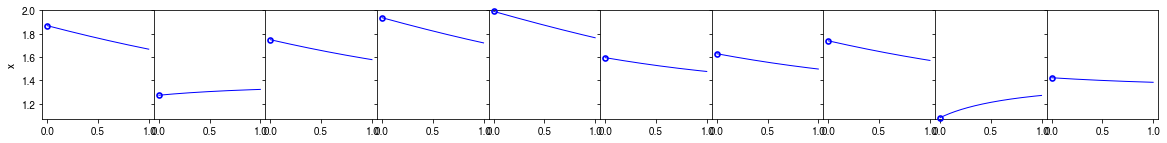

In [49]:
plt.figure(figsize=(20,2))
m = p.fittingModelDict['Model 1']
m.plotResults(sirIsaacData[20:30],indepParamsList[20:30],
              plotInitialConditions=True,plotFittingData=False,
             maxTime=1);

<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8

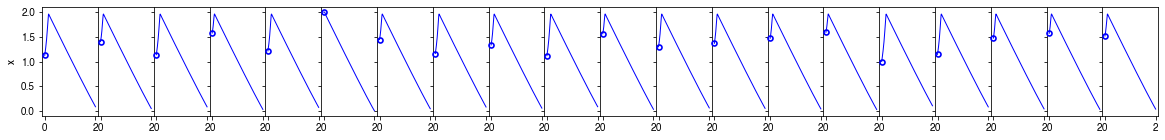

In [53]:
plt.figure(figsize=(20,2))
m = p.getBestModel()
m.plotResults(p.fittingData,p.indepParamsList,
              plotInitialConditions=True,plotFittingData=False,
              maxTime=2);

In [ ]:
# END BCD testing

<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply


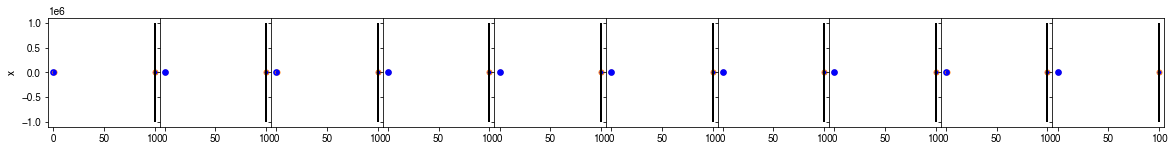

In [37]:
plt.figure(figsize=(20,2))
p.plotBestModelResults(plotInitialConditions=True,indices=range(10),maxTime=1);

<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


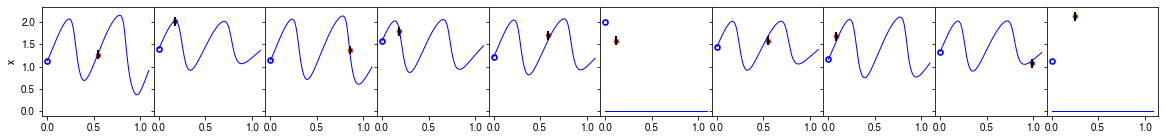

In [27]:
plt.figure(figsize=(20,2))
p.plotBestModelResults(plotInitialConditions=True,indices=range(10));

And now for out-of-sample data:

<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply


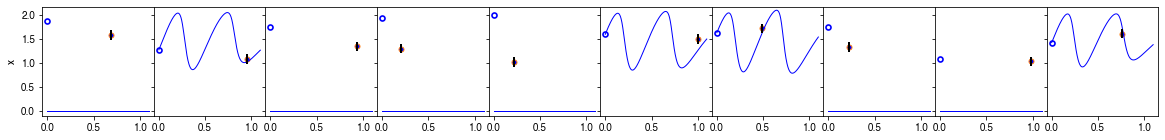

In [13]:
plt.figure(figsize=(20,2))
m = p.getBestModel()
m.plotResults(sirIsaacData[20:30],indepParamsList[20:30],
              plotInitialConditions=True,plotFittingData=True);

We can look at the selected model's parameters:

In [14]:
# new
m = p.getBestModel()
print(m.getParameters())

[
('log_alpha_0', 1.7225457716848371),
('log_beta_0', 0.3321167018792365),
('g_0_0', -0.12494936432861134),
('h_0_0', -2.0895439704672674),
('g_0_1', -0.7288883619473852),
('h_0_1', 3.475946916099947),
('g_0_2', 1.3902709591269946),
('h_0_2', 0.9564780088952947),
('log_alpha_1', 0.11780149262912323),
('log_beta_1', 1.552750436954982),
('g_1_1', 1.9117921698303262),
('h_1_1', 2.4595461782268804),
('g_1_0', 2.9294550995040565),
('h_1_0', -0.7522871957688211),
('g_2_2', 1.1441123076243016),
('g_2_0', -1.1938151116387097),
]


In [13]:
# old
m = p.getBestModel()
print(m.getParameters())

[
('log_alpha_0', 1.448499956554572),
('log_beta_0', -2.7421668745158065),
('g_0_0', 0.5733726369364367),
('h_0_0', 6.113657634917001),
('g_0_1', -1.6744640338117187),
('h_0_1', 3.5504480786798562),
('g_0_2', 0.0007681682989298746),
('log_alpha_1', 0.28183083904679274),
('log_beta_1', 1.80143719486644),
('g_1_1', 3.8636025056956003),
('h_1_1', 2.709018461565593),
('g_1_0', 2.1231511392774345),
('h_1_0', -0.7803639346374973),
('g_2_2', -0.026182715641127466),
]


The following will use SloppyCell to output a latex file with the ODEs describing the selected model:

In [14]:
m = p.getBestModel()
fittingProblem.IO.eqns_TeX_file(m.net,filename='simpleExample_selectedModel.tex')

More details
------------

We can examine the dynamics of the hidden nodes as well using plotResults.

<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


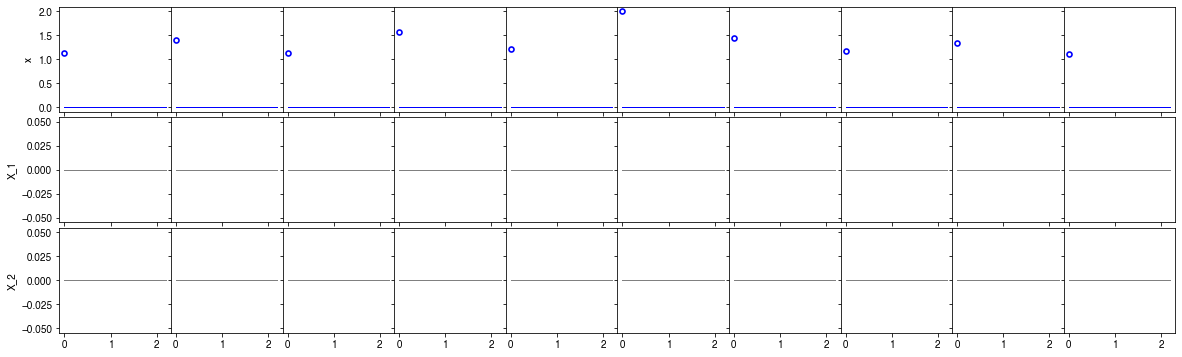

In [52]:
# new
plt.figure(figsize=(20,6))
m = p.getBestModel()
m.plotResults(p.fittingData[:10],p.indepParamsList[:10],
              plotInitialConditions=True,plotHiddenNodes=True);

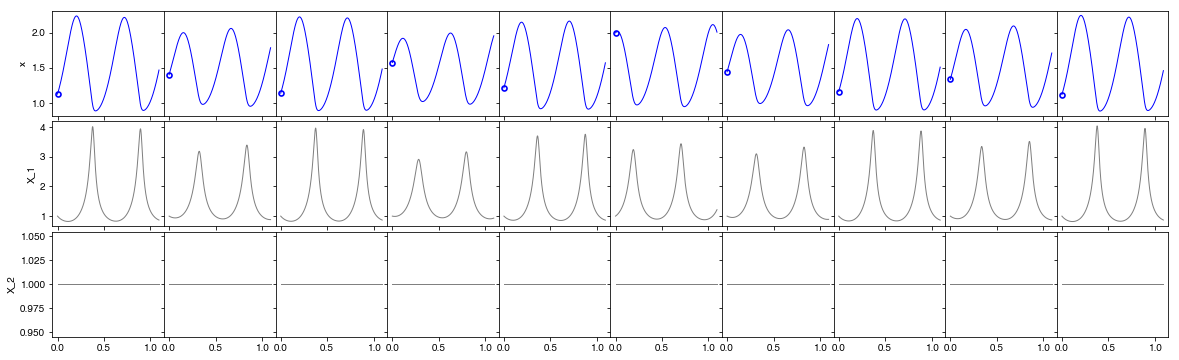

In [15]:
# old
plt.figure(figsize=(20,6))
m = p.getBestModel()
m.plotResults(p.fittingData[:10],p.indepParamsList[:10],
              plotInitialConditions=True,plotHiddenNodes=True);

We have access to raw trajectories using evaluateVec.  Here we use this to plot a projection of trajectories in phase space for the first in-sample initial conditions:

<string>:8: RuntimeWarning: invalid value encountered in multiply


Text(0, 0.5, 'X_1')

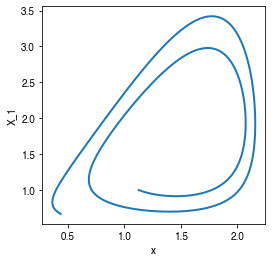

In [38]:
# new
plt.figure(figsize=(4,4))
times = np.linspace(0,1,1000)
xdata = m.evaluateVec(times,'x',p.indepParamsList[0])
X1data = m.evaluateVec(times,'X_1',p.indepParamsList[0])
fittingProblem.Plotting.plot(xdata,X1data)
plt.xlabel('x')
plt.ylabel('X_1')

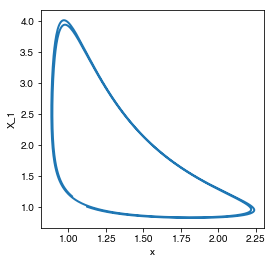

In [16]:
# old
plt.figure(figsize=(4,4))
times = np.linspace(0,1,1000)
xdata = m.evaluateVec(times,'x',p.indepParamsList[0])
X1data = m.evaluateVec(times,'X_1',p.indepParamsList[0])
fittingProblem.Plotting.plot(xdata,X1data)
plt.xlabel('x')
plt.ylabel('X_1')

We can also look at other models that SirIsaac fit in searching for the best one.  In this case, 'Model 6' was selected because it has the largest estimated log-likelihood:

In [17]:
# new 
for name in p.fittingModelNames:
  if name in p.logLikelihoodDict.keys():
    print('{}: #species = {}, #params = {}, L = {}'.format(name,
            len(p.fittingModelDict[name].speciesNames),
            p.numParametersDict[name],
            p.logLikelihoodDict[name]))
print()
print('Selected model:',p.maxLogLikelihoodName())

Model 1: #species = 1, #params = 2, L = -224.07812402405025
Model 2: #species = 1, #params = 4, L = -139.09319873032885
Model 3: #species = 2, #params = 7, L = -139.09634792180532
Model 4: #species = 2, #params = 9, L = -66.80412291995628
Model 5: #species = 2, #params = 11, L = -60.76991789955318
Model 6: #species = 3, #params = 14, L = -61.45186316541741
Model 7: #species = 3, #params = 16, L = -44.06032152588135
Model 8: #species = 3, #params = 18, L = -52.66083032782883
Model 9: #species = 3, #params = 20, L = -47.889531257391404
Model 10: #species = 3, #params = 22, L = -48.31761103938211

Selected model: Model 7


In [17]:
# old
for name in p.fittingModelNames:
  if name in p.logLikelihoodDict.keys():
    print('{}: #species = {}, #params = {}, L = {}'.format(name,
            len(p.fittingModelDict[name].speciesNames),
            p.numParametersDict[name],
            p.logLikelihoodDict[name]))
print()
print('Selected model:',p.maxLogLikelihoodName())

Model 1 : #species = 1 , #params = 2 , L = -224.07812402405023
Model 2 : #species = 1 , #params = 4 , L = -139.0931987303462
Model 3 : #species = 2 , #params = 7 , L = -139.09634792180137
Model 4 : #species = 2 , #params = 9 , L = -66.80402759455359
Model 5 : #species = 2 , #params = 11 , L = -60.71246311542691
Model 6 : #species = 3 , #params = 14 , L = -46.232353901020495
Model 7 : #species = 3 , #params = 16 , L = -48.75294182446126
Model 8 : #species = 3 , #params = 18 , L = -55.785711936594325
Model 9 : #species = 3 , #params = 20 , L = -61.47738413001833

Selected model: Model 6


A model with more parameters fits in-sample data better but out-of-sample data worse:

<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply
<string>:8: RuntimeWarning: invalid value encountered in multiply


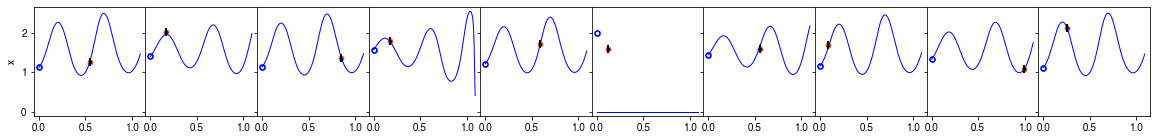

In [34]:
# new
plt.figure(figsize=(20,2))
m2 = p.fittingModelDict['Model 9']
m2.plotResults(sirIsaacData[:10],indepParamsList[:10],
              plotInitialConditions=True,plotFittingData=True);

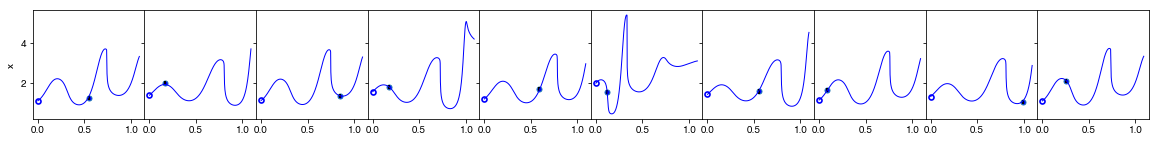

In [18]:
# old
plt.figure(figsize=(20,2))
m2 = p.fittingModelDict['Model 9']
m2.plotResults(sirIsaacData[:10],indepParamsList[:10],
              plotInitialConditions=True,plotFittingData=True);

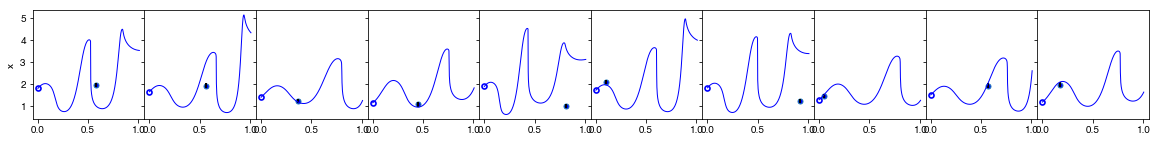

In [19]:
plt.figure(figsize=(20,2))
m2.plotResults(sirIsaacData[30:40],indepParamsList[30:40],
              plotInitialConditions=True,plotFittingData=True);

Also potentially useful is the Hessian at the best-fit parameters:

In [37]:
# new
hess = p.HessianDict[p.maxLogLikelihoodName()]
u,singVals,vt = np.linalg.svd( hess )
np.sort(singVals)

array([1.14037391e-01, 1.27548095e-01, 1.39678670e-01, 1.68463433e-01,
       2.33377605e-01, 3.64725065e-01, 1.21800507e+00, 2.05597596e+00,
       3.46145870e+00, 9.41089981e+00, 2.28763794e+01, 3.77711451e+01,
       1.71423348e+02, 2.57567987e+03, 1.26361944e+04, 1.70934314e+05])

In [20]:
# old
hess = p.HessianDict[p.maxLogLikelihoodName()]
u,singVals,vt = scipy.linalg.svd( hess )
scipy.sort(singVals)

array([1.11111111e-01, 1.11111111e-01, 1.26611990e-01, 1.46913301e-01,
       2.67699534e-01, 1.05570785e+00, 1.16739326e+00, 7.83431246e+00,
       1.76391726e+01, 3.02708880e+01, 1.75268088e+02, 7.55975517e+02,
       1.89813671e+04, 5.22043947e+04])

Other details about what happened during parameter fitting are stored within each fittingModel:

In [33]:
# new
m = p.getBestModel()
print("Acceptance ratio for initial parameter ensemble = {}".format(m.acceptanceRatio))
c = sum(np.array(m.currentResiduals(p.fittingData,p.indepParamsList,includePriors=False))**2)
print("Sum of squared residuals at best-fit (without priors) = {}".format(c))
print("Convergence flags for local fits: {}".format(m.convFlagList))
print("Number of cost evaluations for local fits: {}".format(m.numCostCallsList))
print("Number of gradient evaluations for local fits: {}".format(m.numGradCallsList))

Acceptance ratio for initial parameter ensemble = 0.833
Sum of squared residuals at best-fit (without priors) = 16.691250150746455
Convergence flags for local fits: [1, 0, 0, 0, 0, 1, 0, 0, 0, 1]
Number of cost evaluations for local fits: [187, 307, 304, 315, 341, 343, 330, 309, 316, 14]
Number of gradient evaluations for local fits: [49, 101, 101, 101, 101, 93, 101, 101, 101, 1]


In [21]:
m = p.getBestModel()
print("Acceptance ratio for initial parameter ensemble = {}".format(m.acceptanceRatio))
c = sum(scipy.array(m.currentResiduals(p.fittingData,p.indepParamsList,includePriors=False))**2)
print("Sum of squared residuals at best-fit (without priors) = {}".format(c))
print("Convergence flags for local fits: {}".format(m.convFlagList))
print("Number of cost evaluations for local fits: {}".format(m.numCostCallsList))
print("Number of gradient evaluations for local fits: {}".format(m.numGradCallsList))

Acceptance ratio for initial parameter ensemble = 0.95
Sum of squared residuals at best-fit (without priors) = 18.848587040639458
Convergence flags for local fits: [0, 4, 2, 0, 0, 1, 1, 4, 3, 0]
Number of cost evaluations for local fits: [309, 77, 80, 312, 330, 162, 248, 170, 81, 342]
Number of gradient evaluations for local fits: [101, 25, 25, 101, 101, 43, 71, 56, 26, 101]


Finally, since in this case we know the function used to create the data, we can compare:

<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


<string>:8: RuntimeWarning: invalid value encountered in multiply
capi_return is NULL
Call-back cb_res_in_daskr__user__routines failed.


SloppyCellFittingModel.evaluateVec: WARNING: Exception in integration. Returning default value for all requested times.


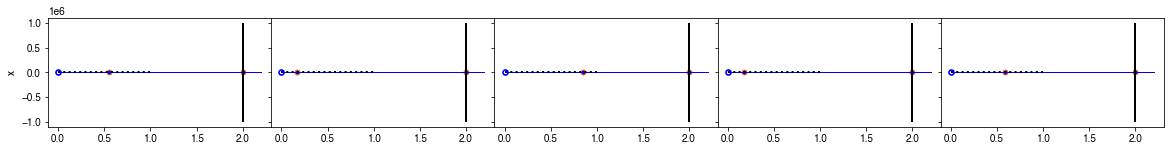

In [51]:
plt.figure(figsize=(20,2))
indicesToPlot = range(5)
axArray = p.plotBestModelResults(plotInitialConditions=True,indices=indicesToPlot)

# compare to model that generated the data
f = lambda x0,t: 1.5 + 0.5*np.sin(4.*np.pi*t + np.arcsin(2.*x0 - 3.))
for i,indepParams in enumerate(np.array(indepParamsList)[indicesToPlot]):
    times = np.linspace(0,1,100)
    x0 = indepParams[0]
    fittingProblem.Plotting.sca(axArray[0][i])
    fittingProblem.Plotting.plot(times,f(x0,times),'k:')